### Imports

In [1]:
from datetime import datetime

import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import ipywidgets as widgets
# back end of ipywidgets
from IPython.display import display


import functools
import operator
import re
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Functions

In [2]:
def graphics_bars_pointplot(dataframe, y_axes, x_axis, grid_shape, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    fig, axes = plt.subplots(*grid_shape, figsize=figsize)
    fig.suptitle(f'{title}', fontsize=15)

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes

    _ = graphics_bars_mean_std(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[:len(y_axes)],
        x_axis = x_axis)
    
    _ = graphics_pointplot_mean_std(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes):len(y_axes) * 2],
        x_axis = x_axis)
    
    _ = graphics_boxplot(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * 2: len(y_axes) * 3],
        x_axis = x_axis)
    
    _ = graphics_violinplot(
        dataframe = dataframe,
        y_axes = y_axes,
        axes = axes_list[len(y_axes) * 3:],
        x_axis = x_axis)

    return fig, axes

In [3]:
def graphics_violinplot(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(results_history_sorted_df[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.violinplot(x=f"{x_axis}", y=(f"{y_axis}"), data=dataframe, ax = ax, palette="Set3", bw=.2, cut=1, linewidth=1)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()}', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)
        # ax.set_yscale('log')
        pass

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [4]:
def graphics_boxplot(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(results_history_sorted_df[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.boxplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()}', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)
        # ax.set_yscale('log')
        pass

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [5]:
def graphics_bars_mean_std(dataframe, y_axes, x_axis, grid_shape = None, palette="Blues_d", axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(results_history_sorted_df[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.barplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette,
            capsize=.0, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()} (mean+std)', fontsize=10)
        ax.set_xticklabels(data_xtick_arr, rotation=45)

    # plt.tight_layout()
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [6]:
def graphics_pointplot_mean_std(dataframe, y_axes, x_axis, grid_shape = None, palette=None, axes = None, figsize = (15, 5), show_fig = False, title = 'Complex Plot'):
    flag = False
    fig = None
    if axes is None:
        fig, axes = plt.subplots(*grid_shape, figsize=figsize)
        fig.suptitle(f'{title}', fontsize=15)
        flag = True
        pass

    data_xtick_arr = \
        np.array(
            np.unique(results_history_sorted_df[f"{x_axis}"].values),
            dtype=np.int
    )

    try:
        axes_list = functools.reduce(operator.iconcat, axes, [])
    except:
        axes_list = axes
    for ax, y_axis in zip(axes_list, y_axes):
        _ = sns.pointplot(x=f"{x_axis}", y=(f"{y_axis}"),
            data=dataframe,
            palette=palette,
            capsize=.0, ax = ax)
        # axes[0].get_yaxis().set_visible(False)
        ax.set_title(f'{y_axis.upper()} (mean+std)', fontsize=10)
        # ax.set_xticklabels(data_xtick_arr, rotation=45)

    
    if flag is False:
        return axes
    else:
        # plt.tight_layout()
        if show_fig: plt.show()
        return fig, axes

In [7]:
def test_concat_arrays():
    res = np.concatenate(([[0, 1, 2]], [[3,4,5]]), axis = 0)
    res_2 = np.concatenate((res, [[5, 6, 7]]), axis = 0)
    res_2
    res_2.mean(axis = 0)
    res_3 = np.concatenate((res_2, [[8, 9, 10]]), axis = 0)
    res_3
    res_3.mean(axis = 0)
    pass

### Fetch Data

In [8]:
# GLobals
train_no = 9 #@param {type:"slider", min:0, max:9, step:1}
columns_df = ['#params', 'seed', 'hl', 'hf', 'mse', 'psnr', 'ssim', 'train_eta']
path_history_train = f'/content/result_comb_train_{train_no}.txt'

path_history_train

'/content/result_comb_train_9.txt'

In [9]:
results_history_arr = np.loadtxt(path_history_train)

In [10]:
results_history_df = pd.DataFrame(
    data = results_history_arr,
    columns = columns_df)

### Dataframe: brief description

In [11]:
results_history_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,train_eta
0,66817.0,0.0,1.0,256.0,0.014530,18.377266,0.587331,269.959578
1,66817.0,0.0,1.0,256.0,0.014530,18.377266,0.587331,270.179720
2,66817.0,42.0,1.0,256.0,0.015104,18.209032,0.571104,268.111078
3,66817.0,42.0,1.0,256.0,0.015104,18.209032,0.571104,271.784820
4,66817.0,123.0,1.0,256.0,0.015256,18.165677,0.567613,269.589478


In [12]:
results_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #params    20 non-null     float64
 1   seed       20 non-null     float64
 2   hl         20 non-null     float64
 3   hf         20 non-null     float64
 4   mse        20 non-null     float64
 5   psnr       20 non-null     float64
 6   ssim       20 non-null     float64
 7   train_eta  20 non-null     float64
dtypes: float64(8)
memory usage: 1.4 KB


In [13]:
results_history_df.describe()

,#params,seed,hl,hf,mse,psnr,ssim,train_eta
count,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000
mean,145767.400000,49.500000,2.200000,256.0,0.009687,20.444434,0.707459,493.083222
std,66137.367202,52.492105,1.005249,0.0,0.003768,1.669794,0.095946,187.583741
min,66817.000000,0.000000,1.000000,256.0,0.004893,18.165677,0.567613,267.264036
25%,66817.000000,0.000000,1.000000,256.0,0.006743,18.377266,0.587331,271.383545
50%,132609.000000,42.000000,2.000000,256.0,0.008693,20.608278,0.729535,456.030738
75%,198401.000000,123.000000,3.000000,256.0,0.014530,21.711566,0.782564,642.749071
max,264193.000000,123.000000,4.000000,256.0,0.015256,23.104379,0.835944,829.697992


### Dataframe: in depth description

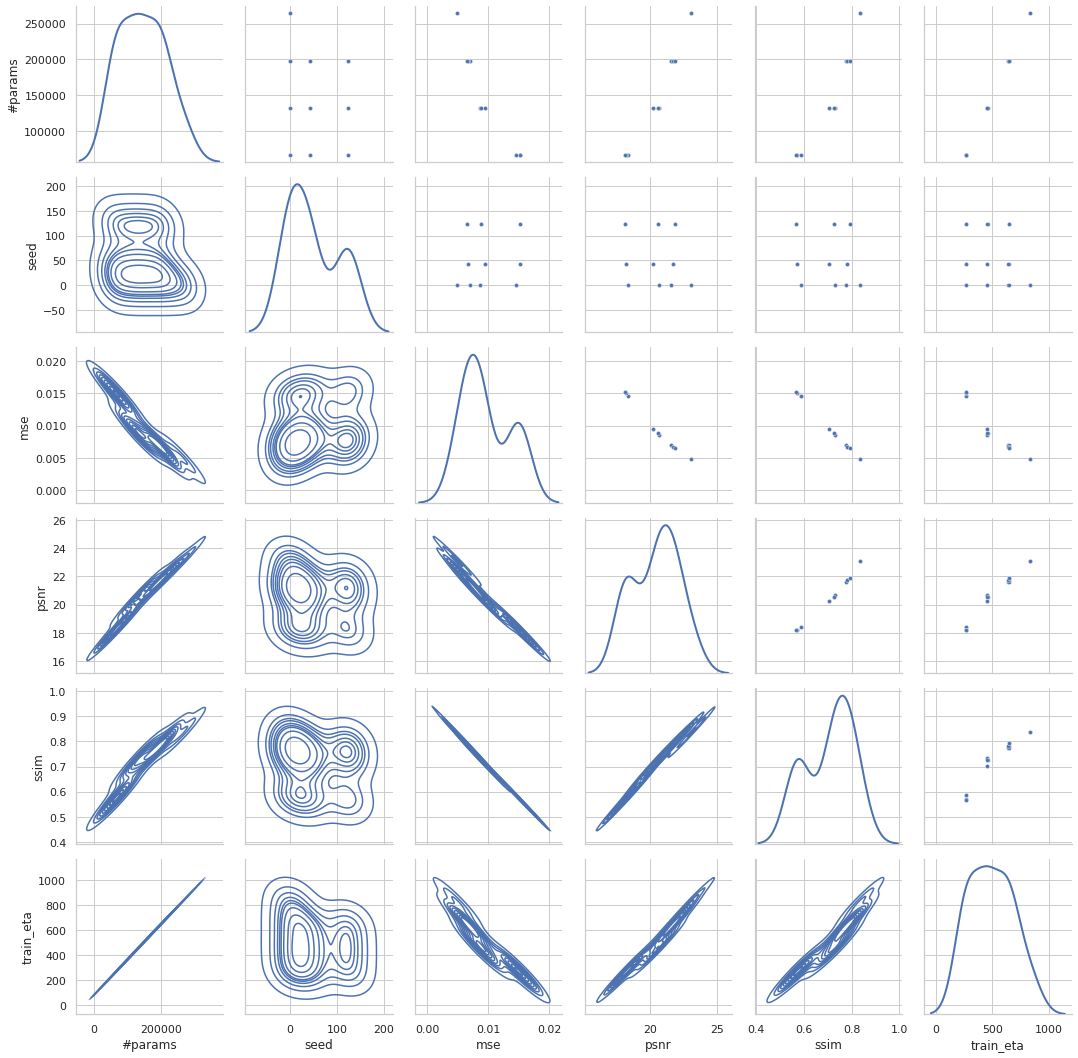

In [14]:
# sns.pairplot(results_history_df)
g = sns.PairGrid(results_history_df.drop(['hf', 'hl'], axis = 1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15) # 
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig(f'scatter_plot_train_no_{train_no}.png')

In [15]:
# Compute Mean and Standard-Deviation for MSE and PSNR
# with respect to data grouped by means of'#params'-attribute
#  within dataframe object: 'results_history_df

results_history_df.groupby(by = ['#params'])[['mse', 'psnr', 'ssim', 'train_eta']]\
    .describe()[[
                ("mse", "mean"), ("mse", "std"),
                ("psnr", "mean"), ("psnr", "std"),
                ("ssim", "mean"), ("ssim", "std"),
                ("train_eta", "mean"), ("train_eta", "std")
                ]]

mse                 psnr  ...      ssim   train_eta          
              mean       std       mean  ...       std        mean       std
#params                                  ...                                
66817.0   0.014963  0.000342  18.250658  ...  0.009411  269.481451  1.601763
132609.0  0.008950  0.000404  20.485622  ...  0.013432  455.040681  3.045506
198401.0  0.006747  0.000204  21.710373  ...  0.007623  642.885688  2.630430
264193.0  0.004893  0.000000  23.104379  ...  0.000000  828.608757  1.540410

[4 rows x 8 columns]

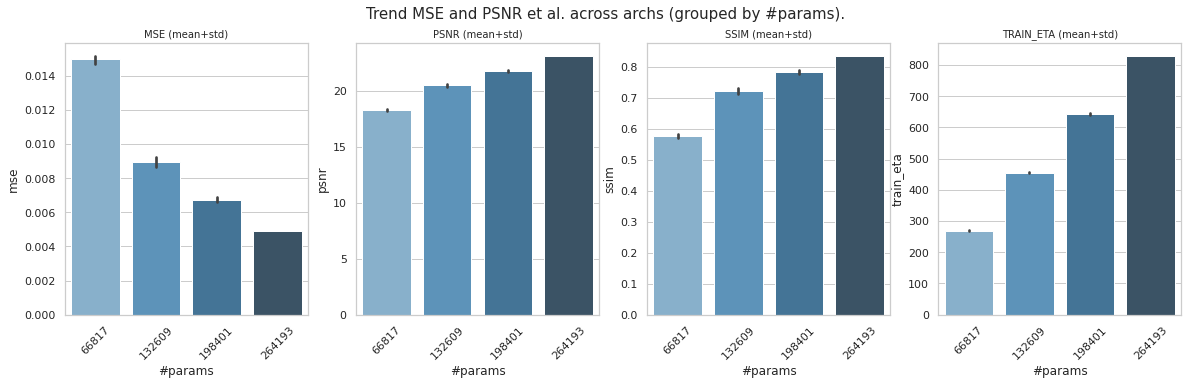

In [16]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_bars_mean_std(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"bar_plot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.show()

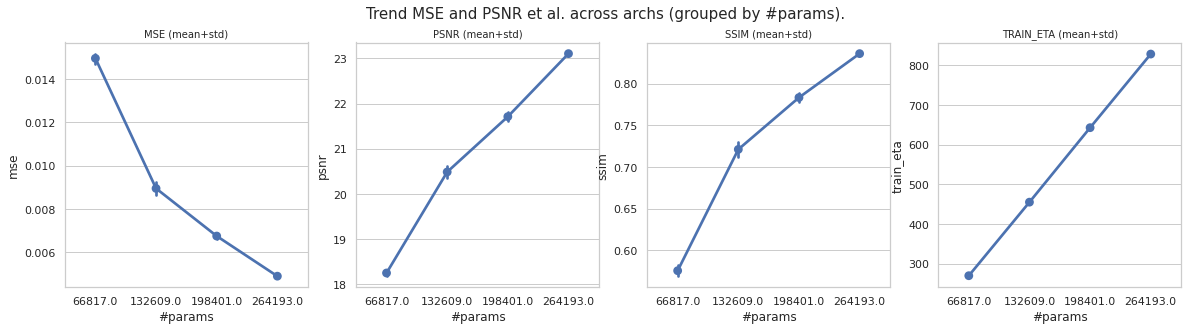

In [17]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_pointplot_mean_std(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape, 
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"pointplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

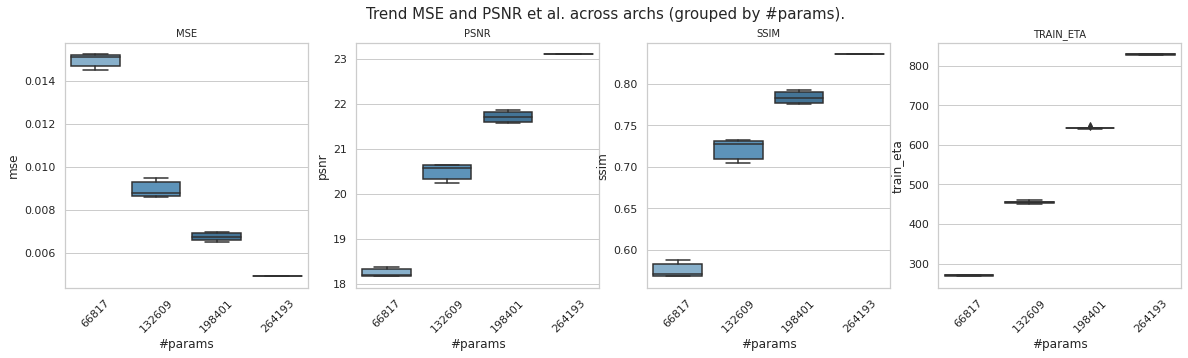

In [18]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_boxplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"boxplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

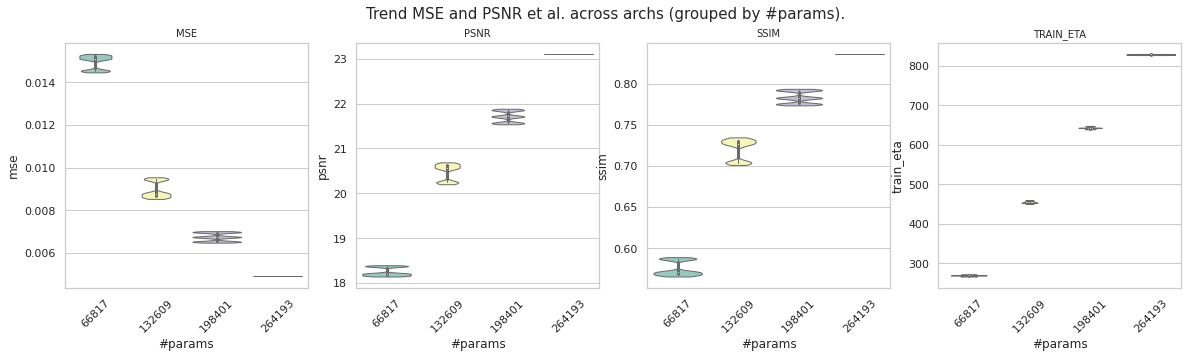

In [19]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])

grid_shape = "(1, 4)" #@param ["(1, 4)", "(4, 1)", "(2, 2)"]
grid_shape = eval(grid_shape)

fig, axes = graphics_violinplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = grid_shape,
    figsize = (20, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"violinplot_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
plt.show()

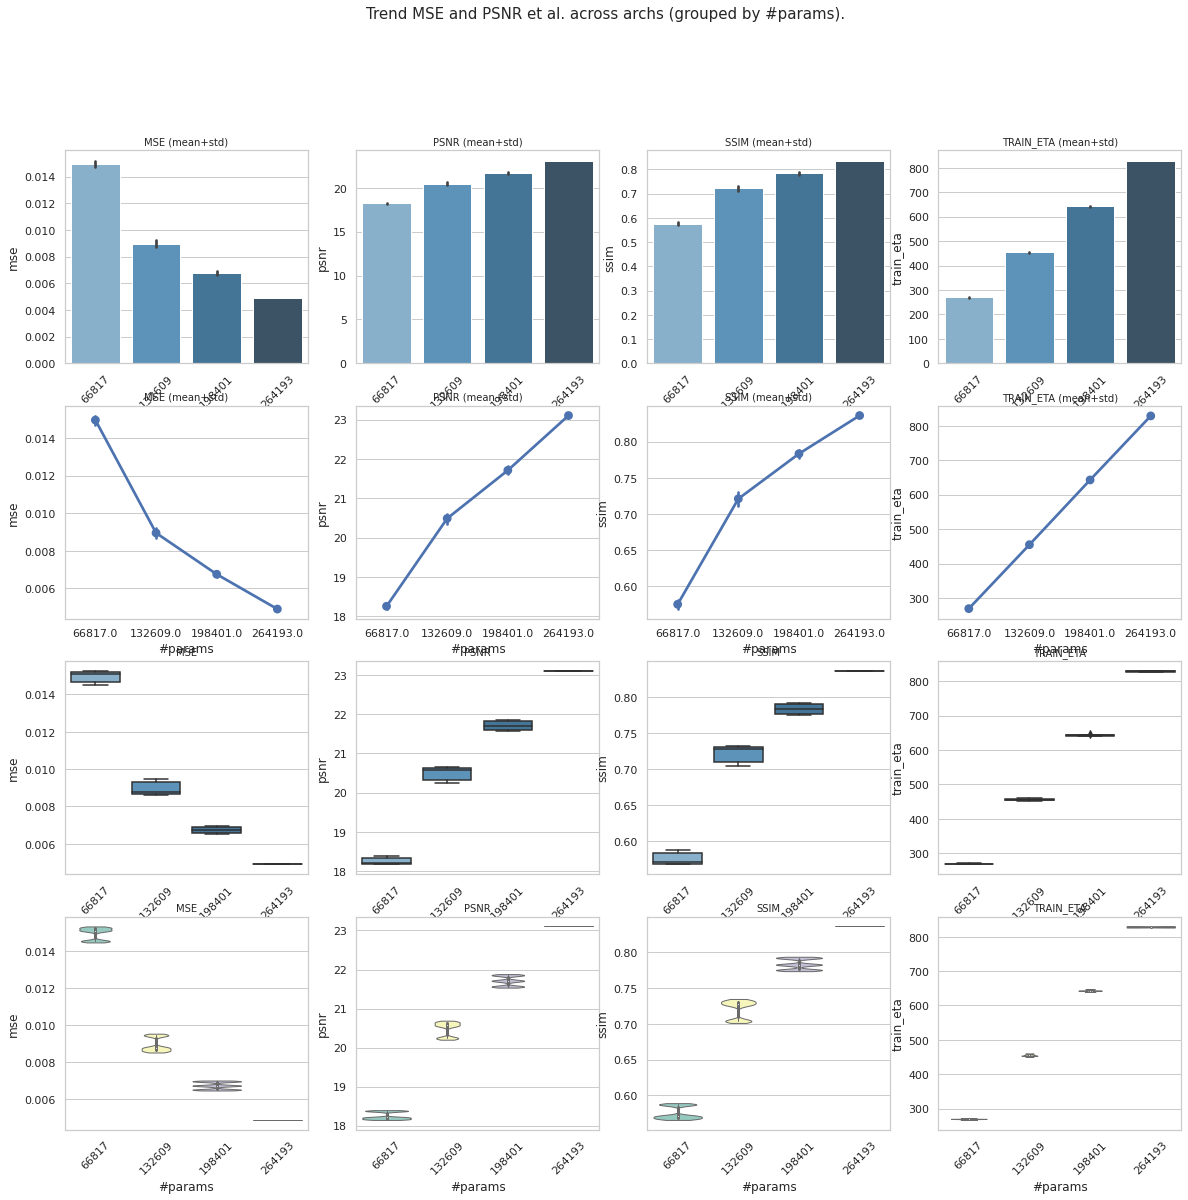

In [20]:
fig, axes = graphics_bars_pointplot(
    dataframe = results_history_sorted_df,
    y_axes = ("mse", "psnr", "ssim", "train_eta"),
    x_axis = "#params",
    grid_shape = (4, 4),
    figsize = (20, 20), palette="Blues_d",
    show_fig = False,
    title = 'Complex Plot')
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)
plt.savefig(f"complex_mse_psnr_et_al_grouped_by_params_train_no_{train_no}.png")
plt.subplots_adjust(bottom = 0.2)
# plt.tight_layout()
plt.show()

### Test Code

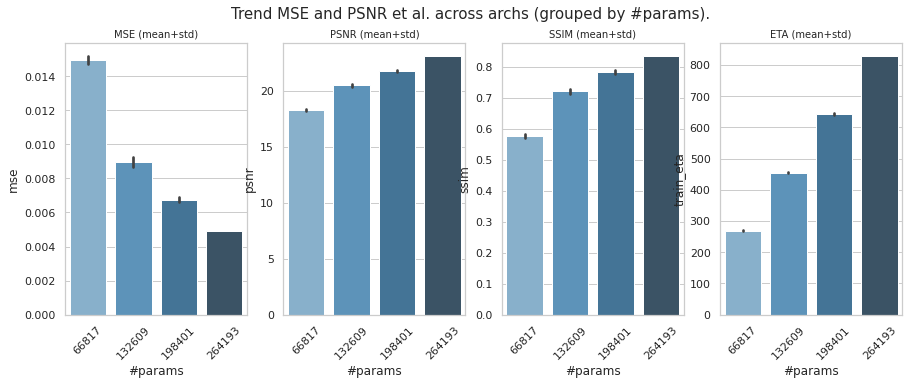

In [21]:
results_history_sorted_df = results_history_df.sort_values(by=['#params', 'hf', 'hl'])
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Trend MSE and PSNR et al. across archs (grouped by #params).', fontsize=15)

num_params_xtick = \
    np.array(
        np.unique(results_history_sorted_df["#params"].values),
        dtype=np.int
    )

ax = sns.barplot(x='#params', y=("mse"),
    data=results_history_sorted_df,
    palette="Blues_d",
    capsize=.0, ax = axes[0])
# axes[0].get_yaxis().set_visible(False)
axes[0].set_title('MSE (mean+std)', fontsize=10)
axes[0].set_xticklabels(num_params_xtick, rotation=45)

sns.barplot(x='#params', y=("psnr"),
    data=results_history_sorted_df,
    palette="Blues_d",
    capsize=.0, ax = axes[1])
# axes[1].get_yaxis().set_visible(False)
axes[1].set_title('PSNR (mean+std)', fontsize=10)
axes[1].set_xticklabels(num_params_xtick, rotation=45)

sns.barplot(x='#params', y=("ssim"),
    data=results_history_sorted_df,
    palette="Blues_d",
    capsize=.0, ax = axes[2])
# axes[2].get_yaxis().set_visible(False)
axes[2].set_title('SSIM (mean+std)', fontsize=10)
axes[2].set_xticklabels(num_params_xtick, rotation=45)

sns.barplot(x='#params', y=("train_eta"),
    data=results_history_sorted_df,
    palette="Blues_d",
    capsize=.0, ax = axes[3])
# axes[2].get_yaxis().set_visible(False)
axes[3].set_title('ETA (mean+std)', fontsize=10)
axes[3].set_xticklabels(num_params_xtick, rotation=45)

# plt.tight_layout()
plt.show()